<a href="https://colab.research.google.com/github/sahana-7/CYA/blob/main/CYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imblearn.over_sampling import RandomOverSampler, ADASYN
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [5]:

df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
classes


,count
Class,
0,284315
1,492


In [7]:
# Train test split
y = df.pop("Class")
X = df

# Using stratify=y for splitting data into stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

In [8]:
def model_evaluation(y_pred_proba_test):
#     Report for different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")
#     best ROC score initialisation
    best_roc_score = 0

#     Iterating through every threshold from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)
#   Calculating different metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))
#   Setting the best roc score, threshold, recall scores.
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall
#   printing the results for every threshold
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")
#   Confusion Matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

In [9]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [10]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Class Distribution Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:", Counter(y_train_smote))

Class Distribution Before SMOTE: Counter({0: 213236, 1: 369})
Class Distribution After SMOTE: Counter({0: 213236, 1: 213236})


In [11]:
results = pd.DataFrame(columns = ['model_name', 'threshold', 'recall', 'roc_auc_score'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits
BEST GRID SCORE 0.976742424001608
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.754		0.846		0.923


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71045                  34
Actual Positive                  19                 104


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.812		0.846		0.923


		CONFUSION MATRIX
         

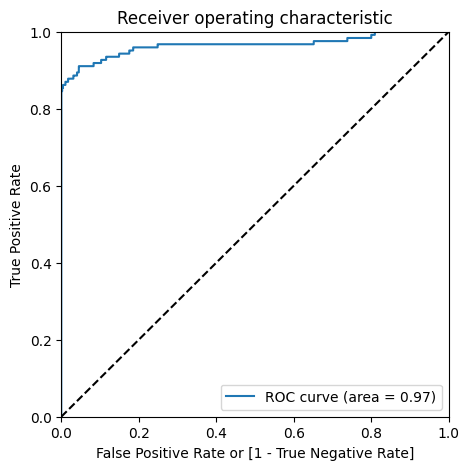

In [12]:
rf_model = RandomForestClassifier(random_state=42)
cv = KFold(2)
param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}


grid = GridSearchCV(rf_model,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf_model = grid.best_estimator_
best_rf_model.fit(X_train, y_train)


y_pred_proba_test = best_rf_model.predict_proba(X_test)


best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)

data = pd.DataFrame([['Random Forest IMB', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

draw_roc(y_test, y_pred_proba_test[:, 1])

Fitting 2 folds for each of 2 candidates, totalling 4 fits

BEST GRID SCORE (SMOTE) 0.9942208712625338
BEST GRID PARAMS (SMOTE)
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   2               71077
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.957		0.036		0.919		0.938


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               68030                3049
Actual Positive                  10                 113


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.987		0.106		0.902		0.945


		CONFUSIO

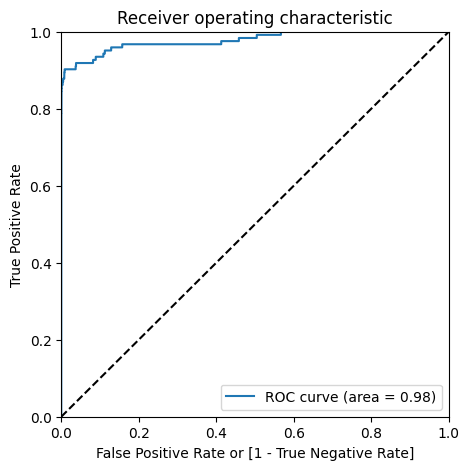

In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_model_smote = RandomForestClassifier(random_state=42)

cv = KFold(2)

param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

grid_smote = GridSearchCV(rf_model_smote,
                         param_grid=param_grid,
                         scoring='roc_auc',
                         cv=cv,
                         n_jobs=-1,
                         verbose=1000)

grid_smote.fit(X_train_smote, y_train_smote)

print("\nBEST GRID SCORE (SMOTE)", grid_smote.best_score_)
print("BEST GRID PARAMS (SMOTE)")
print(grid_smote.best_params_)

best_rf_model_smote = grid_smote.best_estimator_
best_rf_model_smote.fit(X_train_smote, y_train_smote)

y_pred_proba_test_smote = best_rf_model_smote.predict_proba(X_test)

best_roc_score_smote, best_threshold_smote, best_recall_score_smote = model_evaluation(y_pred_proba_test_smote)

data_smote = pd.DataFrame([['Random Forest SMOTE', best_threshold_smote, best_recall_score_smote, best_roc_score_smote]],
                          columns=results.columns)
results = pd.concat([results, data_smote], ignore_index=False)

draw_roc(y_test, y_pred_proba_test_smote[:, 1])



Fitting 2 folds for each of 4 candidates, totalling 8 fits
BEST GRID SCORE nan
BEST GRID PARAMS
{'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.699		0.829		0.914


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71035                  44
Actual Positive                  21                 102


----------for Test with threshold 0.2 ----------
accur

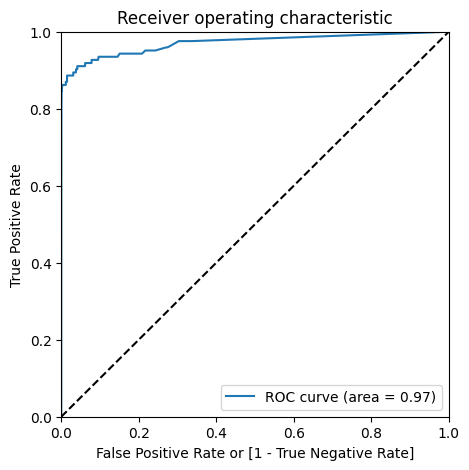

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import pandas as pd

xgb_model = XGBClassifier(use_label_encoder=False, random_state=42)
param_grid = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0]
}

pipeline = Pipeline([
    ('classifier', xgb_model)
])


cv = KFold(2)


grid = GridSearchCV(pipeline,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=cv,
                    n_jobs=-1,
                    verbose=1000)


grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_xgb_model = grid.best_estimator_


y_pred_proba_test = best_xgb_model.named_steps['classifier'].predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)

data = pd.DataFrame([['XGBoost IMB', best_threshold, best_recall_score, best_roc_score]], columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

draw_roc(y_test, y_pred_proba_test[:, 1])


Fitting 2 folds for each of 4 candidates, totalling 8 fits

BEST GRID SCORE nan
BEST GRID PARAMS
{'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.919		0.019		0.919		0.919


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               65290                5789
Actual Positive                  10                 113


----------for Test with threshold 0.2 ----------
accu

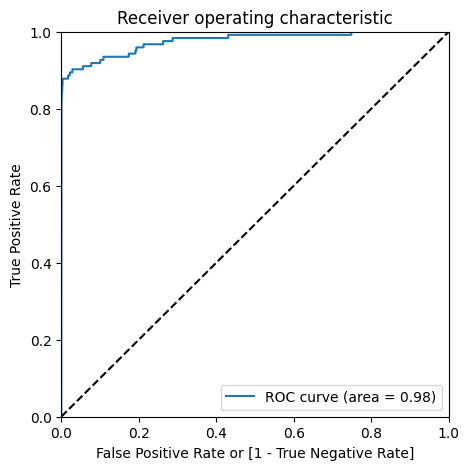

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import pandas as pd

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, random_state=42)

param_grid = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0]
}

pipeline = Pipeline([
    ('classifier', xgb_model)
])

cv = KFold(2)

grid = GridSearchCV(pipeline,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=cv,
                    n_jobs=-1,
                    verbose=1000)

grid.fit(X_train_smote, y_train_smote)

print("\nBEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_xgb_model = grid.best_estimator_

y_pred_proba_test = best_xgb_model.named_steps['classifier'].predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)

data = pd.DataFrame([['XGBoost SMOTE', best_threshold, best_recall_score, best_roc_score]], columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

draw_roc(y_test, y_pred_proba_test[:, 1])


In [16]:

results.sort_values("recall", ascending=False, inplace=True)
results = results.drop_duplicates(subset=['model_name'], keep='first')
results

,model_name,threshold,recall,roc_auc_score
0,Random Forest SMOTE,0.2,0.902,0.945
0,XGBoost SMOTE,0.3,0.894,0.936
0,Random Forest IMB,0.1,0.846,0.923
0,XGBoost IMB,0.1,0.829,0.914
